In [1]:
from generating_TC import *
%matplotlib inline

In [2]:
t1=phylonetwork.PhyloNetwork(eNewick='1;')

/Users/cardona/.local/share/virtualenvs/scripts-z_yBTKWJ/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


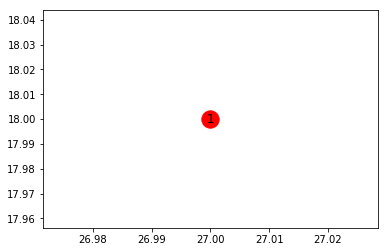

In [3]:
draw(t1)

In [52]:
t2s=find_augmentations(t1,'2')

_1 ()
{'_1'} ()
_1 ('_1',)


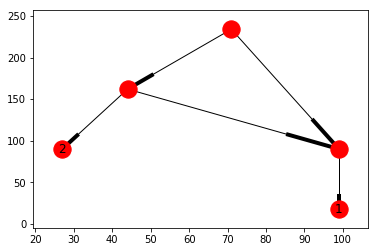

In [54]:
draw(t2s[2])

In [ ]:
n4=find_networks(['1','2','3','4'])

_1 ()
{'_1'} ()
_1 ('_1',)
3
_1 ()
_2 ()
_3 ()
{'_1'} ()
{'_1', '_2'} ()
{'_1', '_3'} ()
{'_2'} ()
{'_2', '_3'} ()
{'_3'} ()
_1 ('_1',)
_1 ('_2',)
_1 ('_3',)
_2 ('_1',)
_2 ('_2',)
_2 ('_3',)
_3 ('_1',)
_3 ('_2',)
_3 ('_3',)
{'_1'} ('_2',)
{'_1'} ('_3',)
{'_1', '_2'} ('_3',)
{'_1', '_3'} ('_2',)
{'_2'} ('_1',)
{'_2'} ('_3',)
{'_2', '_3'} ('_1',)
{'_3'} ('_1',)
{'_3'} ('_2',)
_1 ('_1', '_3')
_1 ('_2', '_3')
_1 ('_3', '_1')
_1 ('_3', '_2')
_2 ('_1', '_3')
_2 ('_2', '_3')
_2 ('_3', '_1')
_2 ('_3', '_2')
_3 ('_1', '_3')
_3 ('_2', '_3')
_3 ('_3', '_1')
_3 ('_3', '_2')
{'_1'} ('_2', '_3')
{'_1'} ('_3', '_2')
{'_2'} ('_1', '_3')
{'_2'} ('_3', '_1')
43
_1 ()
_5 ()
_4 ()
_3 ()
{'_1'} ()
{'_1', '_5'} ()
{'_1', '_4'} ()
{'_1', '_3'} ()
{'_5'} ()
{'_4', '_5'} ()
{'_3', '_5'} ()
{'_4'} ()
{'_4', '_3'} ()
{'_3'} ()
_1 ('_4',)
_5 ('_4',)
_4 ('_4',)
_3 ('_4',)
{'_1'} ('_4',)
{'_1', '_5'} ('_4',)
{'_1', '_3'} ('_4',)
{'_5'} ('_4',)
{'_3', '_5'} ('_4',)
{'_3'} ('_4',)
67
_1 ()
_2 ()
_4 ()
_3 ()
{'_1'} ()

372
_2 ()
_4 ()
_5 ()
_1 ()
_3 ()
{'_2'} ()
{'_2', '_4'} ()
{'_2', '_5'} ()
{'_1', '_2'} ()
{'_2', '_3'} ()
{'_4'} ()
{'_4', '_5'} ()
{'_1', '_4'} ()
{'_4', '_3'} ()
{'_5'} ()
{'_1', '_5'} ()
{'_3', '_5'} ()
{'_1'} ()
{'_1', '_3'} ()
{'_3'} ()
_2 ('_2',)
_2 ('_4',)
_2 ('_1',)
_2 ('_3',)
_4 ('_2',)
_4 ('_4',)
_4 ('_1',)
_4 ('_3',)
_5 ('_2',)
_5 ('_4',)
_5 ('_5',)
_5 ('_1',)
_5 ('_3',)
_1 ('_2',)
_1 ('_4',)
_1 ('_5',)
_1 ('_1',)
_1 ('_3',)
_3 ('_2',)
_3 ('_4',)
_3 ('_5',)
_3 ('_1',)
_3 ('_3',)
{'_2'} ('_1',)
{'_2'} ('_3',)
{'_2'} ('_4',)
{'_2', '_4'} ('_1',)
{'_2', '_4'} ('_3',)
{'_2', '_5'} ('_1',)
{'_2', '_5'} ('_4',)
{'_2', '_5'} ('_3',)
{'_1', '_2'} ('_3',)
{'_1', '_2'} ('_4',)
{'_2', '_3'} ('_1',)
{'_2', '_3'} ('_4',)
{'_4'} ('_1',)
{'_4'} ('_2',)
{'_4'} ('_3',)
{'_4', '_5'} ('_1',)
{'_4', '_5'} ('_2',)
{'_4', '_5'} ('_3',)
{'_1', '_4'} ('_3',)
{'_1', '_4'} ('_2',)
{'_4', '_3'} ('_1',)
{'_4', '_3'} ('_2',)
{'_5'} ('_1',)
{'_5'} ('_2',)
{'_5'} ('_4',)
{'_5'} ('_3',)
{'_1', '_5'} ('_2

1116
_2 ()
_5 ()
_1 ()
_3 ()
_6 ()
_7 ()
{'_2'} ()
{'_2', '_5'} ()
{'_1', '_2'} ()
{'_2', '_3'} ()
{'_6', '_2'} ()
{'_2', '_7'} ()
{'_5'} ()
{'_1', '_5'} ()
{'_3', '_5'} ()
{'_6', '_5'} ()
{'_7', '_5'} ()
{'_1'} ()
{'_1', '_3'} ()
{'_1', '_6'} ()
{'_1', '_7'} ()
{'_3'} ()
{'_6', '_3'} ()
{'_7', '_3'} ()
{'_6'} ()
{'_6', '_7'} ()
{'_7'} ()
_2 ('_2',)
_2 ('_3',)
_2 ('_6',)
_5 ('_2',)
_5 ('_3',)
_1 ('_2',)
_1 ('_3',)
_3 ('_2',)
_3 ('_3',)
_3 ('_6',)
_6 ('_2',)
_6 ('_3',)
_6 ('_6',)
_7 ('_2',)
_7 ('_3',)
{'_2'} ('_3',)
{'_2'} ('_6',)
{'_2', '_5'} ('_3',)
{'_1', '_2'} ('_3',)
{'_2', '_3'} ('_6',)
{'_6', '_2'} ('_3',)
{'_2', '_7'} ('_3',)
{'_5'} ('_2',)
{'_5'} ('_3',)
{'_1', '_5'} ('_2',)
{'_1', '_5'} ('_3',)
{'_3', '_5'} ('_2',)
{'_6', '_5'} ('_2',)
{'_6', '_5'} ('_3',)
{'_7', '_5'} ('_2',)
{'_7', '_5'} ('_3',)
{'_1'} ('_2',)
{'_1'} ('_3',)
{'_1', '_3'} ('_2',)
{'_1', '_6'} ('_3',)
{'_1', '_6'} ('_2',)
{'_1', '_7'} ('_3',)
{'_1', '_7'} ('_2',)
{'_3'} ('_2',)
{'_3'} ('_6',)
{'_6', '_3'} ('_2

1692
_2 ()
_5 ()
_1 ()
_3 ()
_6 ()
_7 ()
{'_2'} ()
{'_2', '_5'} ()
{'_1', '_2'} ()
{'_2', '_3'} ()
{'_6', '_2'} ()
{'_2', '_7'} ()
{'_5'} ()
{'_1', '_5'} ()
{'_3', '_5'} ()
{'_6', '_5'} ()
{'_7', '_5'} ()
{'_1'} ()
{'_1', '_3'} ()
{'_1', '_6'} ()
{'_1', '_7'} ()
{'_3'} ()
{'_6', '_3'} ()
{'_7', '_3'} ()
{'_6'} ()
{'_6', '_7'} ()
{'_7'} ()
_2 ('_2',)
_2 ('_1',)
_2 ('_6',)
_5 ('_2',)
_5 ('_1',)
_5 ('_6',)
_1 ('_2',)
_1 ('_1',)
_1 ('_6',)
_3 ('_2',)
_3 ('_1',)
_3 ('_6',)
_6 ('_2',)
_6 ('_1',)
_6 ('_6',)
_7 ('_2',)
_7 ('_1',)
_7 ('_6',)
{'_2'} ('_1',)
{'_2'} ('_6',)
{'_2', '_5'} ('_1',)
{'_2', '_5'} ('_6',)
{'_1', '_2'} ('_6',)
{'_2', '_3'} ('_1',)
{'_2', '_3'} ('_6',)
{'_6', '_2'} ('_1',)
{'_2', '_7'} ('_1',)
{'_2', '_7'} ('_6',)
{'_5'} ('_2',)
{'_5'} ('_1',)
{'_5'} ('_6',)
{'_1', '_5'} ('_6',)
{'_1', '_5'} ('_2',)
{'_3', '_5'} ('_1',)
{'_3', '_5'} ('_2',)
{'_3', '_5'} ('_6',)
{'_6', '_5'} ('_1',)
{'_6', '_5'} ('_2',)
{'_7', '_5'} ('_1',)
{'_7', '_5'} ('_2',)
{'_7', '_5'} ('_6',)
{'_1'} (

_5 ('_1', '_2', '_5')
_5 ('_1', '_5', '_2')
_1 ('_2', '_5', '_1')
_1 ('_2', '_1', '_5')
_1 ('_5', '_2', '_1')
_1 ('_5', '_1', '_2')
_1 ('_1', '_2', '_5')
_1 ('_1', '_5', '_2')
_3 ('_2', '_5', '_1')
_3 ('_2', '_5', '_3')
_3 ('_2', '_1', '_5')
_3 ('_2', '_1', '_3')
_3 ('_2', '_3', '_5')
_3 ('_2', '_3', '_1')
_3 ('_5', '_2', '_1')
_3 ('_5', '_2', '_3')
_3 ('_5', '_1', '_2')
_3 ('_5', '_1', '_3')
_3 ('_5', '_3', '_2')
_3 ('_5', '_3', '_1')
_3 ('_1', '_2', '_5')
_3 ('_1', '_2', '_3')
_3 ('_1', '_5', '_2')
_3 ('_1', '_5', '_3')
_3 ('_1', '_3', '_2')
_3 ('_1', '_3', '_5')
_3 ('_3', '_2', '_5')
_3 ('_3', '_2', '_1')
_3 ('_3', '_5', '_2')
_3 ('_3', '_5', '_1')
_3 ('_3', '_1', '_2')
_3 ('_3', '_1', '_5')
_6 ('_2', '_5', '_1')
_6 ('_2', '_1', '_5')
_6 ('_5', '_2', '_1')
_6 ('_5', '_1', '_2')
_6 ('_5', '_1', '_6')
_6 ('_5', '_6', '_1')
_6 ('_1', '_2', '_5')
_6 ('_1', '_5', '_2')
_6 ('_1', '_5', '_6')
_6 ('_1', '_6', '_5')
_6 ('_6', '_5', '_1')
_6 ('_6', '_1', '_5')
_7 ('_2', '_5', '_1')
_7 ('_2', 

_3 ('_5', '_1', '_2')
_3 ('_5', '_1', '_3')
_3 ('_5', '_3', '_2')
_3 ('_5', '_3', '_1')
_3 ('_1', '_2', '_5')
_3 ('_1', '_2', '_3')
_3 ('_1', '_5', '_2')
_3 ('_1', '_5', '_3')
_3 ('_1', '_3', '_2')
_3 ('_1', '_3', '_5')
_3 ('_3', '_2', '_5')
_3 ('_3', '_2', '_1')
_3 ('_3', '_5', '_2')
_3 ('_3', '_5', '_1')
_3 ('_3', '_1', '_2')
_3 ('_3', '_1', '_5')
_6 ('_2', '_5', '_1')
_6 ('_2', '_5', '_6')
_6 ('_2', '_1', '_5')
_6 ('_2', '_6', '_5')
_6 ('_5', '_2', '_1')
_6 ('_5', '_2', '_6')
_6 ('_5', '_1', '_2')
_6 ('_5', '_6', '_2')
_6 ('_1', '_2', '_5')
_6 ('_1', '_5', '_2')
_6 ('_6', '_2', '_5')
_6 ('_6', '_5', '_2')
_7 ('_2', '_5', '_1')
_7 ('_2', '_1', '_5')
_7 ('_2', '_1', '_7')
_7 ('_2', '_7', '_1')
_7 ('_5', '_2', '_1')
_7 ('_5', '_1', '_2')
_7 ('_1', '_2', '_5')
_7 ('_1', '_2', '_7')
_7 ('_1', '_5', '_2')
_7 ('_1', '_7', '_2')
_7 ('_7', '_2', '_1')
_7 ('_7', '_1', '_2')
{'_4'} ('_2', '_5', '_1')
{'_4'} ('_2', '_1', '_5')
{'_4'} ('_5', '_2', '_1')
{'_4'} ('_5', '_1', '_2')
{'_4'} ('_1', '_

3542
_8 ()
_2 ()
_5 ()
_1 ()
_3 ()
_6 ()
_7 ()
{'_8'} ()
{'_8', '_2'} ()
{'_8', '_5'} ()
{'_8', '_1'} ()
{'_8', '_3'} ()
{'_8', '_6'} ()
{'_8', '_7'} ()
{'_2'} ()
{'_2', '_5'} ()
{'_1', '_2'} ()
{'_2', '_3'} ()
{'_6', '_2'} ()
{'_2', '_7'} ()
{'_5'} ()
{'_1', '_5'} ()
{'_3', '_5'} ()
{'_6', '_5'} ()
{'_7', '_5'} ()
{'_1'} ()
{'_1', '_3'} ()
{'_1', '_6'} ()
{'_1', '_7'} ()
{'_3'} ()
{'_6', '_3'} ()
{'_7', '_3'} ()
{'_6'} ()
{'_6', '_7'} ()
{'_7'} ()
_8 ('_3',)
_2 ('_3',)
_5 ('_3',)
_1 ('_3',)
_3 ('_3',)
_6 ('_3',)
_7 ('_3',)
{'_8'} ('_3',)
{'_8', '_2'} ('_3',)
{'_8', '_5'} ('_3',)
{'_8', '_1'} ('_3',)
{'_8', '_6'} ('_3',)
{'_8', '_7'} ('_3',)
{'_2'} ('_3',)
{'_2', '_5'} ('_3',)
{'_1', '_2'} ('_3',)
{'_6', '_2'} ('_3',)
{'_2', '_7'} ('_3',)
{'_5'} ('_3',)
{'_1', '_5'} ('_3',)
{'_6', '_5'} ('_3',)
{'_7', '_5'} ('_3',)
{'_1'} ('_3',)
{'_1', '_6'} ('_3',)
{'_1', '_7'} ('_3',)
{'_6'} ('_3',)
{'_6', '_7'} ('_3',)
{'_7'} ('_3',)
3605
_8 ()
_2 ()
_5 ()
_1 ()
_3 ()
_9 ()
_6 ()
_7 ()
{'_8'} ()
{'

_5 ('_6', '_1')
_1 ('_1', '_6')
_1 ('_6', '_1')
_3 ('_1', '_3')
_3 ('_1', '_6')
_3 ('_3', '_1')
_3 ('_3', '_6')
_3 ('_6', '_1')
_3 ('_6', '_3')
_9 ('_1', '_9')
_9 ('_1', '_6')
_9 ('_9', '_1')
_9 ('_6', '_1')
_6 ('_1', '_6')
_6 ('_6', '_1')
_7 ('_1', '_6')
_7 ('_6', '_1')
_7 ('_6', '_7')
_7 ('_7', '_6')
{'_8'} ('_1', '_6')
{'_8'} ('_6', '_1')
{'_8', '_2'} ('_1', '_6')
{'_8', '_2'} ('_6', '_1')
{'_8', '_5'} ('_1', '_6')
{'_8', '_5'} ('_6', '_1')
{'_8', '_3'} ('_1', '_6')
{'_8', '_3'} ('_6', '_1')
{'_8', '_9'} ('_1', '_6')
{'_8', '_9'} ('_6', '_1')
{'_8', '_7'} ('_1', '_6')
{'_8', '_7'} ('_6', '_1')
{'_2'} ('_1', '_6')
{'_2'} ('_6', '_1')
{'_2', '_5'} ('_1', '_6')
{'_2', '_5'} ('_6', '_1')
{'_2', '_3'} ('_1', '_6')
{'_2', '_3'} ('_6', '_1')
{'_2', '_9'} ('_1', '_6')
{'_2', '_9'} ('_6', '_1')
{'_2', '_7'} ('_1', '_6')
{'_2', '_7'} ('_6', '_1')
{'_5'} ('_1', '_6')
{'_5'} ('_6', '_1')
{'_3', '_5'} ('_1', '_6')
{'_3', '_5'} ('_6', '_1')
{'_5', '_9'} ('_1', '_6')
{'_5', '_9'} ('_6', '_1')
{'_7

In [ ]:
len(n4)

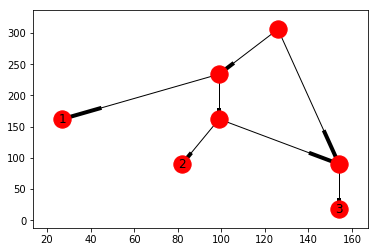

In [8]:
draw(n3[4])

In [9]:
t1.is

Phylogenetic Network with taxa [1].

In [10]:
l=[False,True]

In [11]:
or(l)

SyntaxError: invalid syntax (<ipython-input-11-ef76b6c5e924>, line 1)

In [9]:
for n in n3:
    print( is_tree_child(n), n.eNewick())

True ((1,3),2);
True ((2,3),1);
True ((1,2),3);
True (((1,_4),(3)_4),2);
True (((3)_4,1),(2,_4));
True ((((3)_4,1),2),_4);
True (((2,_4),(3)_4),1);
True ((((3)_4,2),1),_4);
True (((1,2),_4),(3)_4);
True ((((1)_7,3),_7),2);
True ((((2)_7,3),1),_7);
True 
True ((((1)_7,3),2),_7);
True ((((2)_7,3),_7),1);
True 
True (((1)_7,2),(3,_7));
True (((2)_7,1),(3,_7));
True ((((1,2))_7,3),_7);
True (((((2)_9,3))_4,(1,_4)),_9);
True 
True 
True ((((((2)_9,3))_4,1),_9),_4);
True (((((1)_9,3))_4,(2,_4)),_9);
True 
True ((((((1)_9,3))_4,2),_9),_4);
True ((((1)_9,3))_4,((2,_9),_4));
True ((((2)_9,3))_4,((1,_9),_4));
True 
True 
True 
True 
True 
True 
True 
True 
True ((((((1)_8,2))_9,3),_8),_9);
True ((((((2)_8,1))_9,3),_8),_9);
True ((((1)_9,3),((2,_9))_8),_8);
True ((((1,_9))_8,((2)_9,3)),_8);
True 
True 
True 
True 
True (((1,3),_2),(2)_2);
True (((1,_2),3),(2)_2);
True (((1,_2),(2)_2),3);
True (((2,3))_2,(1,_2));
True ((((1,_6),(3)_6),_2),(2)_2);
True (((((3)_6,1),_2),_6),(2)_2);
True (((((3)_6,1)

In [11]:
n3[12].eNewick()

'((((1)_7,3),2),_7);'

/Users/cardona/.local/share/virtualenvs/scripts-z_yBTKWJ/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/cardona/.local/share/virtualenvs/scripts-z_yBTKWJ/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/Users/cardona/.local/share/virtualenvs/scripts-z_yBTKWJ/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


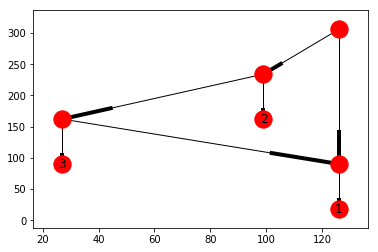

In [12]:
draw(n3[12])

In [13]:
len(n3)

91